In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]

df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"]=="g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


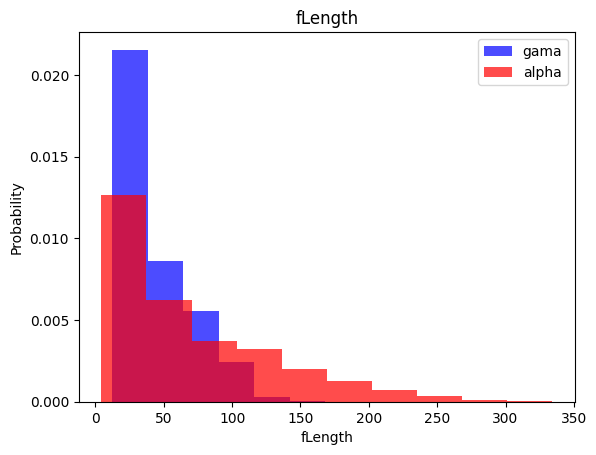

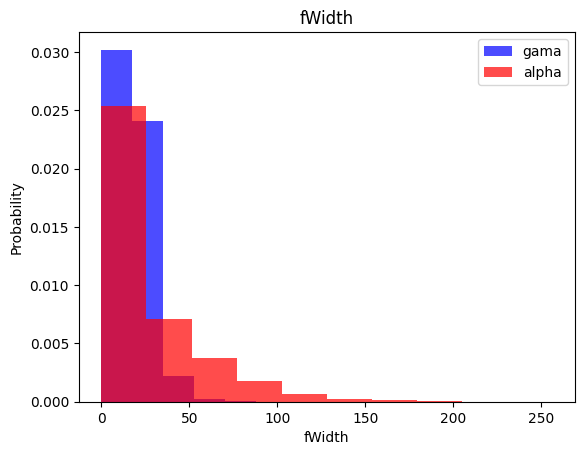

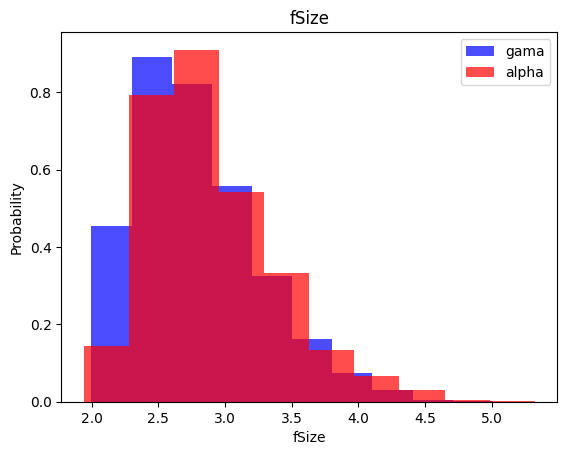

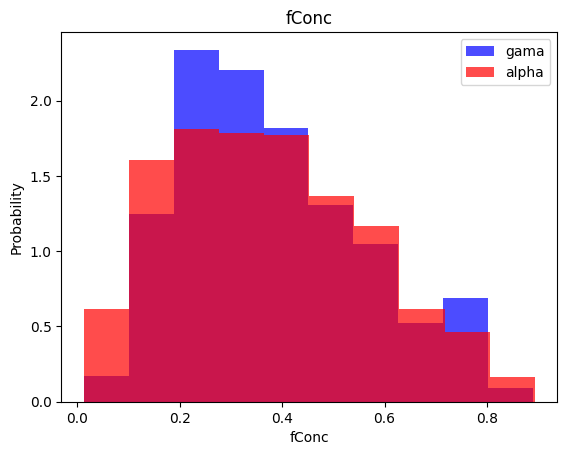

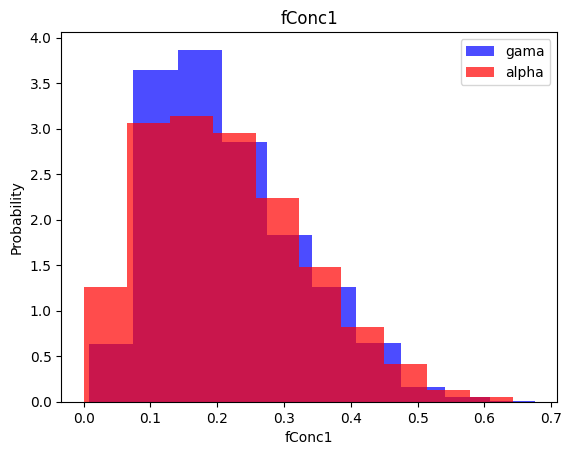

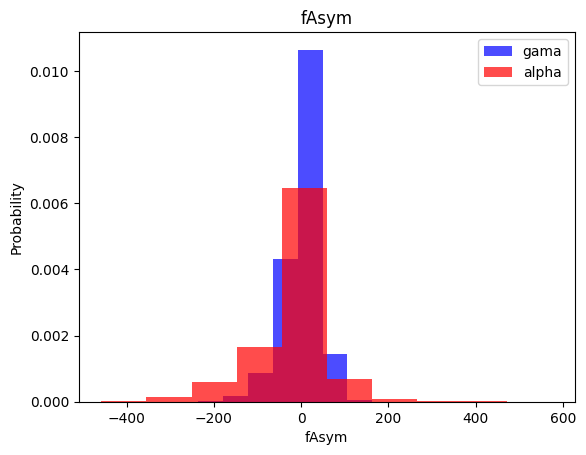

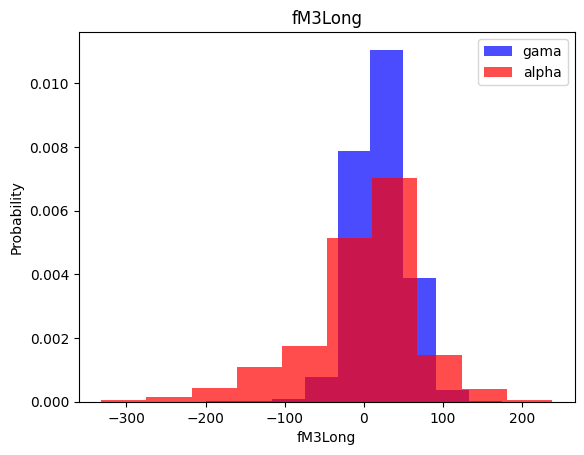

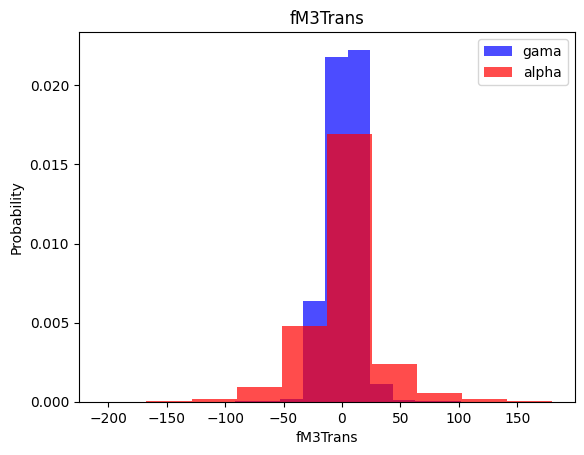

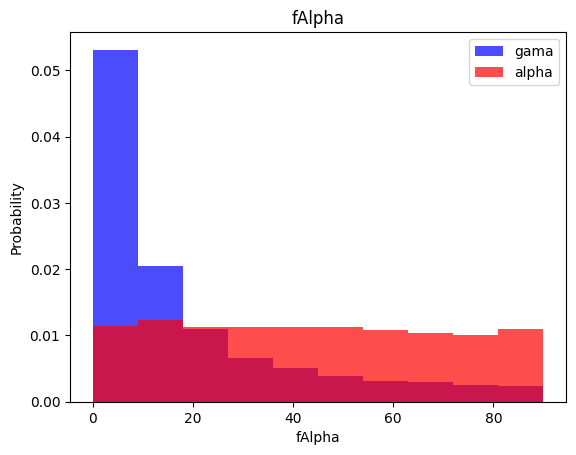

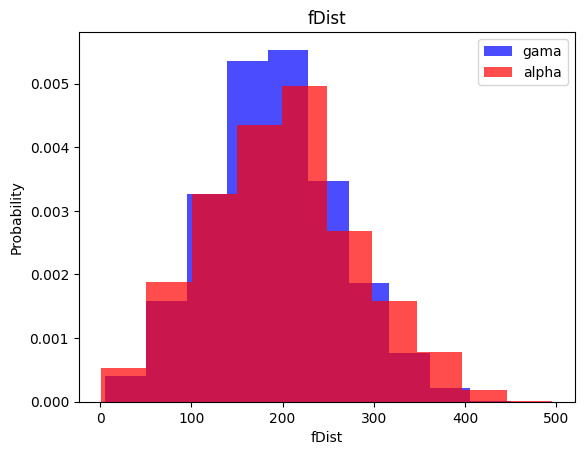

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color="blue",label="gama", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color="red",label="alpha", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()



In [7]:
train, valid, test = np.split(
    df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (len(y), 1))))

    return data, X, y


In [9]:
print(len(train))
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))


11412
7381
4031


In [10]:
train, X_train, y_train = scale_dataset(train,True)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

In [11]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))


14762
7381
7381


# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model_n1 = KNeighborsClassifier(n_neighbors=1)
knn_model_n1.fit(X_train,y_train)
y_preds = knn_model_n1.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1344
           1       0.83      0.89      0.86      2460

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [14]:
knn_model_ntest = KNeighborsClassifier(n_neighbors=7)
knn_model_ntest.fit(X_train,y_train)
y_preds = knn_model_ntest.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1344
           1       0.85      0.88      0.86      2460

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.67      0.40      0.50      1344
           1       0.73      0.89      0.80      2460

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1344
           1       0.84      0.82      0.83      2460

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1344
           1       0.89      0.91      0.90      2460

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Network

In [21]:
import tensorflow as tf

print(
    tf.config.threading.get_intra_op_parallelism_threads(),
    tf.config.threading.get_inter_op_parallelism_threads()
)

# tf.config.threading.set_intra_op_parallelism_threads(4)
# tf.config.threading.set_inter_op_parallelism_threads(8)

tf.config.list_physical_devices()

print(
    tf.config.threading.get_intra_op_parallelism_threads(),
    tf.config.threading.get_inter_op_parallelism_threads()
)

2022-10-02 23:51:49.522183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 23:51:49.650544: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 23:51:50.114708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mrk22/miniconda3/envs/tf/lib/
2022-10-02 23:51:50.114809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin

0 0
0 0


2022-10-02 23:51:50.593035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-02 23:51:50.597497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-02 23:51:50.597562: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [22]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [23]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    with tf.device('/CPU:0'):
        nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(
                num_nodes, activation='relu', input_shape=(10,)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation='relu'),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                         metrics=['accuracy'])
        history = nn_model.fit(
            X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(
                X_valid, y_valid), verbose=0
        )

        return nn_model, history


In [24]:
# nn_model, hist = train_model(X_train, y_train, 32, 0.4, 0.001, 32, 100)
# plot_history(hist)

In [25]:
least_val_loss = float('inf')
least_loss_model = None
paramComb = 0
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(
                    f"\n{paramComb}:\t{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                paramComb += 1
                model, history = train_model(
                    X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                # plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model



0:	16 nodes, dropout 0, lr 0.01, batch size 32


2022-10-02 23:51:51.599132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 23:51:51.602739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-02 23:51:51.602817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-02 23:51:51.602853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

 19/119 [===>..........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8454

2022-10-02 23:52:46.557073: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


119/119 [==============================] - 3s 5ms/step - loss: 0.3419 - accuracy: 0.8609

1:	16 nodes, dropout 0, lr 0.01, batch size 64
119/119 [==============================] - 1s 6ms/step - loss: 0.3445 - accuracy: 0.8580

2:	16 nodes, dropout 0, lr 0.01, batch size 128
119/119 [==============================] - 1s 5ms/step - loss: 0.3502 - accuracy: 0.8625

3:	16 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 1s 6ms/step - loss: 0.3516 - accuracy: 0.8591

4:	16 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 1s 5ms/step - loss: 0.3394 - accuracy: 0.8662

5:	16 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 1s 6ms/step - loss: 0.3423 - accuracy: 0.8604

6:	16 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 1s 6ms/step - loss: 0.3242 - accuracy: 0.8638

7:	16 nodes, dropout 0, lr 0.001, batch size 64
119/119 [=========================

In [26]:
#32 nodes, dropout 0.2, lr 0.005, batch size 64
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1344
           1       0.89      0.91      0.90      2460

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

